## Analysis of review.json

#### Data loading

In [1]:
import json
import pandas as pd

# review.json is too large (6.3 gb)
data_size = 500000

with open("yelp_dataset/yelp_academic_dataset_review.json", 'r') as f:
    review_head = [next(f) for x in range(data_size)]
f.close()

review_data = []
for line in review_head:
    review_data.append(json.loads(line))

df = pd.DataFrame(review_data)
print("%i records loaded, each composed by %i columns." % (df.shape[0], df.shape[1]))

500000 records loaded, each composed by 9 columns.


#### Data preview

In [5]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,-MhfebM0QIsKt87iDN-FNw,0,2015-04-15 05:21:16,0,xQY8N_XvtGbearJ5X4QryQ,2.0,"As someone who has worked with many museums, I...",5,OwjRMXRC0KyPrIlcjaXeFQ
1,lbrU8StCq3yDfr-QMnGrmQ,0,2013-12-07 03:16:52,1,UmFMZ8PyXZTY2QcwzsfQYA,1.0,I am actually horrified this place is still in...,1,nIJD_7ZXHq-FX8byPMOkMQ
2,HQl28KMwrEKHqhFrrDqVNQ,0,2015-12-05 03:18:11,0,LG2ZaYiOgpr2DK_90pYjNw,5.0,I love Deagan's. I do. I really do. The atmosp...,1,V34qejxNsCbcgD8C0HVk-Q
3,5JxlZaqCnk1MnbgRirs40Q,0,2011-05-27 05:30:52,0,i6g_oA9Yf9Y31qt0wibXpw,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,ofKDkJKXSKZXu5xJNGiiBQ
4,IS4cv902ykd8wj1TR0N3-A,0,2017-01-14 21:56:57,0,6TdNDKywdbjoTkizeMce8A,4.0,"Oh happy day, finally have a Canes near my cas...",0,UgMW8bLE0QMJDCkQ1Ax5Mg


#### Top Rated

In [6]:
df.sort_values(by=['stars', 'useful'], ascending=False).head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1482,SZEFE5hL7aN5nM-A44iPwQ,93,2013-10-24 06:28:58,75,-5pP4o7XUpFWL2Kb9u5B_A,5.0,I stopped by at Prime tonight after a grueling...,98,SIpBqzGhRM7T5cDFiuIryg
25086,gh6__q2WXFuyN8gt6VAnWw,9,2014-10-28 03:54:42,10,qkYzuhbw1-yOD9t82iivXA,5.0,I so badly wish that this place would open up ...,76,1WMybC-FYKZJr0KgEUshcA
2918,gh6__q2WXFuyN8gt6VAnWw,7,2014-02-24 02:03:31,4,qTzLq73vK3falC7qpQuuVA,5.0,Four of us met here for lunch so that we could...,65,PKEzKWv_FktMm2mGPjwd0Q
78828,gh6__q2WXFuyN8gt6VAnWw,4,2014-09-28 17:59:38,4,orDGaFRsyee6OF9a839Dxg,5.0,I've never even tried Portuguese so I was a bi...,60,ZsjuEgOdvx9l5GKZdtwYIw
77085,nqTvE7ivdU23oUWdI01tOA,57,2017-10-12 04:55:01,41,7ji4Eg5H5tJQXXrZ3dmZ9A,5.0,Did someone say chicken and waffles...or is th...,59,59GSwMflQFllOAWvw0F5mw


#### Scatter plot (useful, stars)

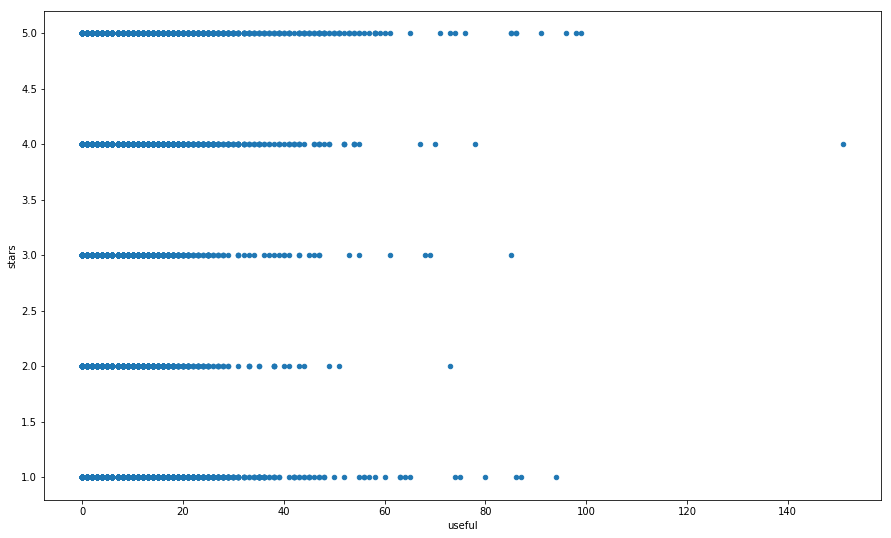

In [5]:
import matplotlib.pyplot as plt

df.plot.scatter(x='useful', y='stars', figsize=(15,9))
plt.show()

#### Correlation matrix

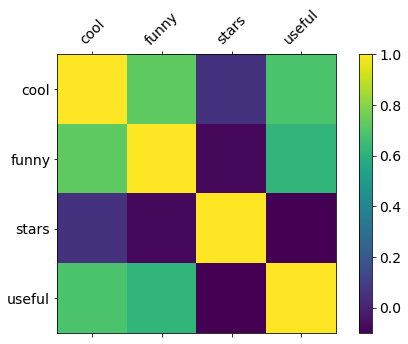

In [11]:
df_corr = df[['cool', 'funny', 'stars', 'useful']]
f = plt.figure(figsize=(8, 5))
plt.matshow(df_corr.corr(), fignum=f.number)
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)